In [353]:
def get_random_matrix(size: int = 6) -> Matrix:
    m = Matrix(SR, [[floor(random()*3+1) for i in range(size)] for _ in range(size)])
    return m

In [354]:
def get_random_vector(size: int = 6) -> Matrix:
    return Matrix(SR, [[floor(random()*3+1)] for i in range(6)])

In [355]:
b = get_random_vector().transpose()

In [356]:
latex(b)

\left(\begin{array}{rrrrrr}
1 & 3 & 1 & 1 & 2 & 1
\end{array}\right)

In [357]:
m = get_random_matrix()
m = m.transpose()*m
# m=Matrix(SR, [[11, 1, 4, 8, 5, 10],
#                    [1, 2, 2, 2, 1, 3],
#                    [4, 2, 9, 1, 0, 4],
#                    [8, 2, 1, 9, 6, 10],
#                    [5, 1, 0, 6, 5, 6],
#                    [10, 3, 4, 10, 6, 13]])
def check_matrix(m):
    for i in range(1,6):
        if m[:i,:i].det() <= 0:
            return False
    print(m.change_ring(RR).eigenvalues())
    if True in list(map(lambda x: x<=0, m.change_ring(RR).eigenvalues())):
        return False
    return True

while not check_matrix(m):
    m = get_random_matrix()
    
latex(m)

[162.832065705276, 10.5922873727935, 4.70843451235329, 1.78629088338168, 1.07778748616104, 0.00313404003406182]


/tmp/ipykernel_4668/2643229711.py:13: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  print(m.change_ring(RR).eigenvalues())
/tmp/ipykernel_4668/2643229711.py:14: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  if True in list(map(lambda x: x<=Integer(0), m.change_ring(RR).eigenvalues())):


\left(\begin{array}{rrrrrr}
26 & 19 & 27 & 22 & 28 & 30 \\
19 & 20 & 25 & 21 & 22 & 24 \\
27 & 25 & 36 & 30 & 31 & 32 \\
22 & 21 & 30 & 28 & 26 & 24 \\
28 & 22 & 31 & 26 & 33 & 31 \\
30 & 24 & 32 & 24 & 31 & 38
\end{array}\right)

In [358]:
x = Matrix([[var('x1')],[var('x2')],[var('x3')],[var('x4')],[var('x5')],[var('x6')]])

In [359]:
xt = x.transpose()
xt

[x1 x2 x3 x4 x5 x6]

In [360]:
A=m
f = (1/2*xt*A*x+b*x)[0,0]

In [414]:
old_differential = []
for i in [x1,x2,x3,x4,x5,x6]:
    old_differential.append(diff(f, i))
    print(old_differential)
old_differential = Matrix([[i] for i in old_differential])
print(old_differential)
differential = 1/2*(A.transpose()+A)*Matrix([x1,x2,x3,x4,x5,x6]).transpose()+b.transpose()
print(latex(differential))

[26*x1 + 19*x2 + 27*x3 + 22*x4 + 28*x5 + 30*x6 + 1]
[26*x1 + 19*x2 + 27*x3 + 22*x4 + 28*x5 + 30*x6 + 1, 19*x1 + 20*x2 + 25*x3 + 21*x4 + 22*x5 + 24*x6 + 3]
[26*x1 + 19*x2 + 27*x3 + 22*x4 + 28*x5 + 30*x6 + 1, 19*x1 + 20*x2 + 25*x3 + 21*x4 + 22*x5 + 24*x6 + 3, 27*x1 + 25*x2 + 36*x3 + 30*x4 + 31*x5 + 32*x6 + 1]
[26*x1 + 19*x2 + 27*x3 + 22*x4 + 28*x5 + 30*x6 + 1, 19*x1 + 20*x2 + 25*x3 + 21*x4 + 22*x5 + 24*x6 + 3, 27*x1 + 25*x2 + 36*x3 + 30*x4 + 31*x5 + 32*x6 + 1, 22*x1 + 21*x2 + 30*x3 + 28*x4 + 26*x5 + 24*x6 + 1]
[26*x1 + 19*x2 + 27*x3 + 22*x4 + 28*x5 + 30*x6 + 1, 19*x1 + 20*x2 + 25*x3 + 21*x4 + 22*x5 + 24*x6 + 3, 27*x1 + 25*x2 + 36*x3 + 30*x4 + 31*x5 + 32*x6 + 1, 22*x1 + 21*x2 + 30*x3 + 28*x4 + 26*x5 + 24*x6 + 1, 28*x1 + 22*x2 + 31*x3 + 26*x4 + 33*x5 + 31*x6 + 2]
[26*x1 + 19*x2 + 27*x3 + 22*x4 + 28*x5 + 30*x6 + 1, 19*x1 + 20*x2 + 25*x3 + 21*x4 + 22*x5 + 24*x6 + 3, 27*x1 + 25*x2 + 36*x3 + 30*x4 + 31*x5 + 32*x6 + 1, 22*x1 + 21*x2 + 30*x3 + 28*x4 + 26*x5 + 24*x6 + 1, 28*x1 + 22*x2 + 31*x3 + 2

In [430]:
local_solution = solve([differential[i,0] == 0 for i in range(6)], [x1, x2, x3, x4, x5, x6], solution_dict=True)[0]
print_solution = {}
x_0 = {}
for k in local_solution.keys():
    print_solution[k]=round(RR(local_solution[k]), 3)
    # x_0[k] = round(RR(local_solution[k])+floor(random()*5), 0)
x_0 = {
    x1: -95,
    x2: -50,
    x3: -8,
    x4: 30,
    x5: 16,
    x6: 121
}
print(latex(print_solution))
print(latex(x_0))

\left\{x_{1} : -110.959, x_{2} : -54.469, x_{3} : -29.592, x_{4} : 52.163, x_{5} : 43.041, x_{6} : 78.837\right\}
\left\{x_{1} : -95, x_{2} : -50, x_{3} : -8, x_{4} : 30, x_{5} : 16, x_{6} : 121\right\}


In [431]:
print(latex(local_solution))
print(latex(x_0))

\left\{x_{1} : -\frac{5437}{49}, x_{2} : -\frac{2669}{49}, x_{3} : -\frac{1450}{49}, x_{4} : \frac{2556}{49}, x_{5} : \frac{2109}{49}, x_{6} : \frac{3863}{49}\right\}
\left\{x_{1} : -95, x_{2} : -50, x_{3} : -8, x_{4} : 30, x_{5} : 16, x_{6} : 121\right\}


In [432]:
def get_new_x(xs):
    new_x = Matrix([[xs[x1]], [xs[x2]], [xs[x3]], [xs[x4]], [xs[x5]], [xs[x6]]]) - 0.005*differential(xs)
    # print(xs[x1]-0.0001*differential(xs)[0,0], new_x[0,0])
    # print(differential(xs)[:,0])
    # print()
    return {
        x1: new_x[0,0],
        x2: new_x[1,0],
        x3: new_x[2,0],
        x4: new_x[3,0],
        x5: new_x[4,0],
        x6: new_x[5,0],
    }

cnt = 0
final_cnt = 827
values = []
while abs(f(x_0)-f(get_new_x(x_0)))>0.0001:
    # print(RR(f(local_solution)-f(x_0)))
    x_0 = get_new_x(x_0)
    values.append(f(x_0))
    cnt += 1
    if cnt % final_cnt//4 == 0:
        print (latex(Matrix(x_0.values()).transpose()))
        print(f(x_0))
        
print(f(x_0), cnt)
print(RR(f(local_solution)))

\left(\begin{array}{r}
-100.515000000000 \\
-54.4200000000000 \\
-13.8300000000000 \\
26.0950000000000 \\
10.7350000000000 \\
113.455000000000
\end{array}\right)
10130.3591875000
\left(\begin{array}{r}
-101.807700000000 \\
-55.2507500000000 \\
-14.7045500000000 \\
26.2718000000000 \\
10.1778000000000 \\
110.918675000000
\end{array}\right)
8672.58878006937
\left(\begin{array}{r}
-102.296354750000 \\
-55.4192127500000 \\
-14.6776647500000 \\
27.1612512500000 \\
10.4906001250000 \\
109.362924750000
\end{array}\right)
7989.84674804341
\left(\begin{array}{r}
-104.164203099976 \\
-51.2142854897838 \\
-27.6473299153814 \\
48.9023672959897 \\
40.3964195264675 \\
73.9951271840518
\end{array}\right)
-43.2709186107958
-43.2709186107958 827
-43.4387755102041


In [429]:
print(latex(Matrix(x_0.values()).transpose()))

\left(\begin{array}{r}
-104.164203099976 \\
-51.2142854897838 \\
-27.6473299153814 \\
48.9023672959897 \\
40.3964195264675 \\
73.9951271840518
\end{array}\right)


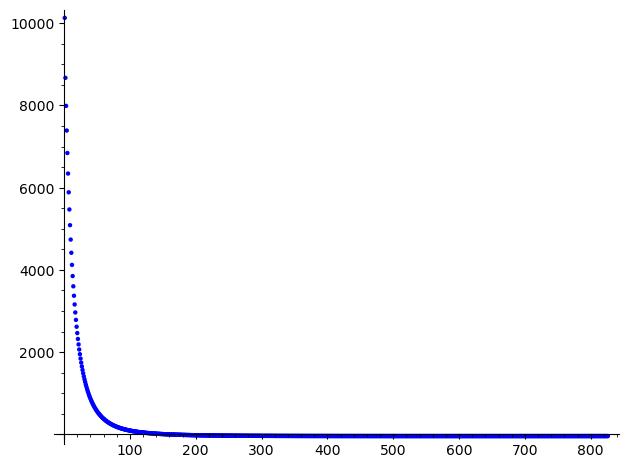

In [462]:
from sage.plot.contour_plot import ContourPlot

pl = None
for po in list(zip(srange(1, final_cnt), values)):
    if pl is None:
        pl = point(po)
    else:
        pl += point(po)
pl.plot()

In [458]:
show(p)

ContourPlot defined by a 826 x 2 data grid